In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the datasets
df_sales_orders = pd.read_excel(r'C:\Users\MOHAMED_DAYAN\OneDrive\Desktop\Pricing Analyst Intern Case Study\Data.xlsx', sheet_name='Sales_orders')
df_cost_of_goods = pd.read_excel(r'C:\Users\MOHAMED_DAYAN\OneDrive\Desktop\Pricing Analyst Intern Case Study\Data.xlsx', sheet_name='Cost_of_Goods')
df_product_sales_order = pd.read_excel(r'C:\Users\MOHAMED_DAYAN\OneDrive\Desktop\Pricing Analyst Intern Case Study\Data.xlsx', sheet_name='Product_sales_order')

# Display first few rows of each dataset
print("Sales Orders Data:")
display(df_sales_orders.head())
print("Cost of Goods Data:")
display(df_cost_of_goods.head())
print("Product Sales Order Data:")
display(df_product_sales_order.head())

Sales Orders Data:


,ORDER_ID,DATE,DAY_NAME,Order_status,SALES
0,6387833,2023-10-01,Sun,Delivered,285.50
1,6385549,2023-10-01,Sun,Delivered,1512.25
2,6387475,2023-10-01,Sun,Delivered,197.50
3,6389331,2023-10-01,Sun,Delivered,67.50
4,6390122,2023-10-01,Sun,Delivered,118.00


Cost of Goods Data:


,product_id,purchase_price,selling_price
0,415,270.56,281.75
1,3495,20.01,21.75
2,152,205.08,212.25
3,72,508.79,540.75
4,974,134.01,144.25


Product Sales Order Data:


,PRODUCT_SALES_ORDER_ID,SALES_ORDER_ID,PRODUCT_ID,SALES
0,68097611,6460123,2438,390.00
1,68009163,6448262,1087,122.25
2,68097089,6460054,142,166.32
3,68060918,6455556,415,226.50
4,68144928,6466586,361,336.00


Boxplots for Sales Orders Data:


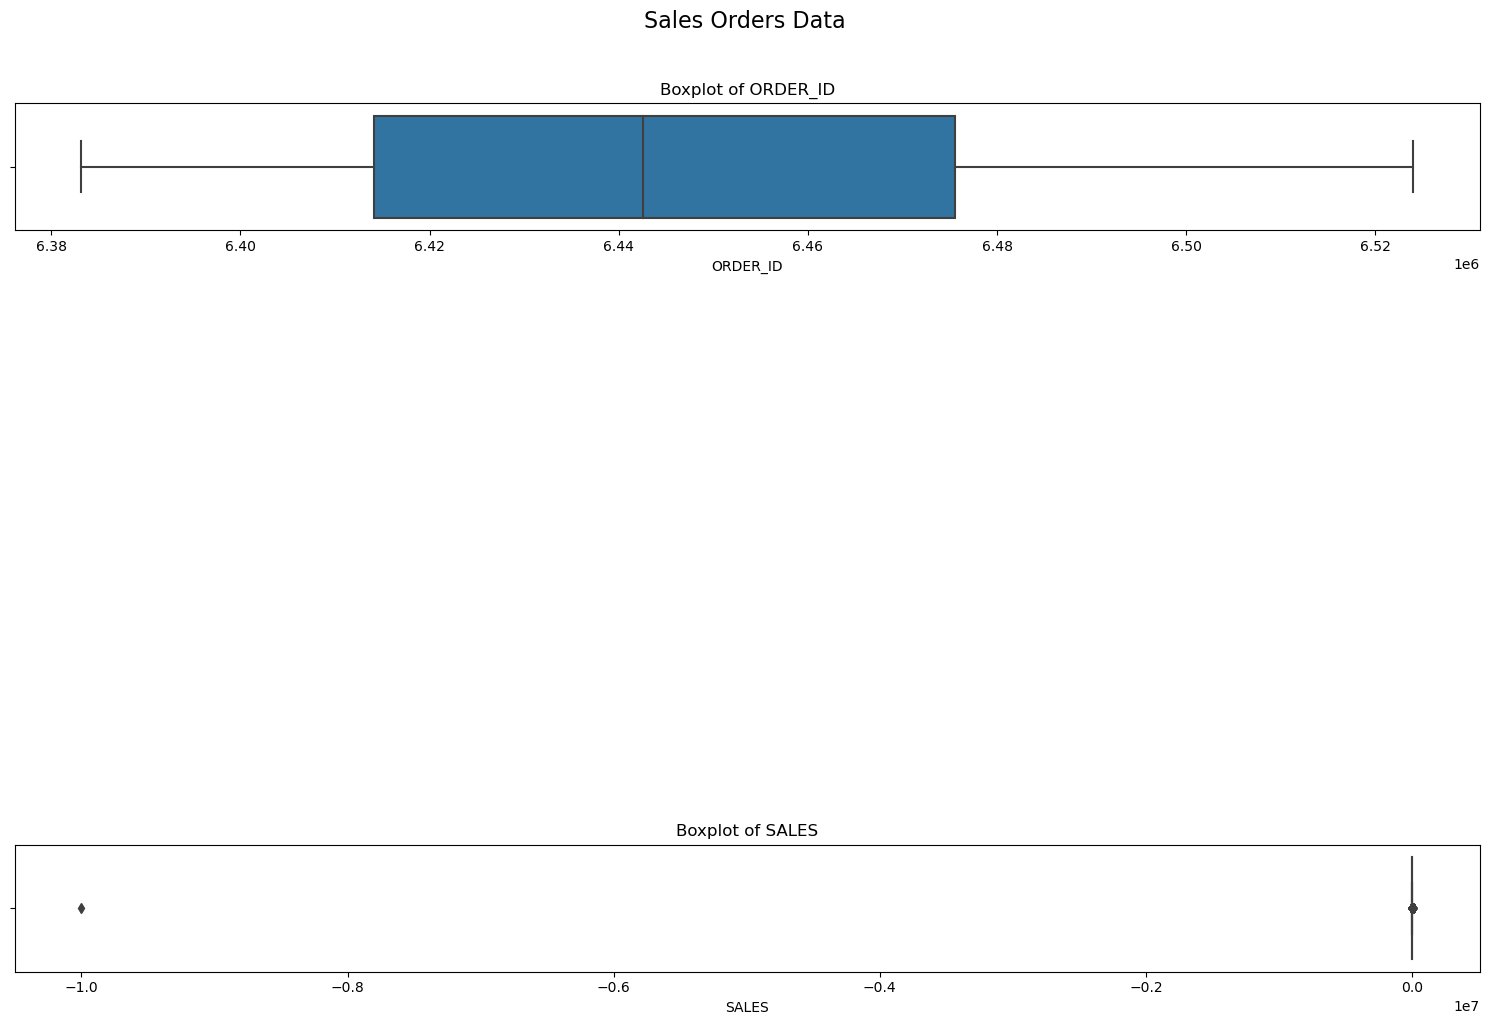

Boxplots for Cost of Goods Data:


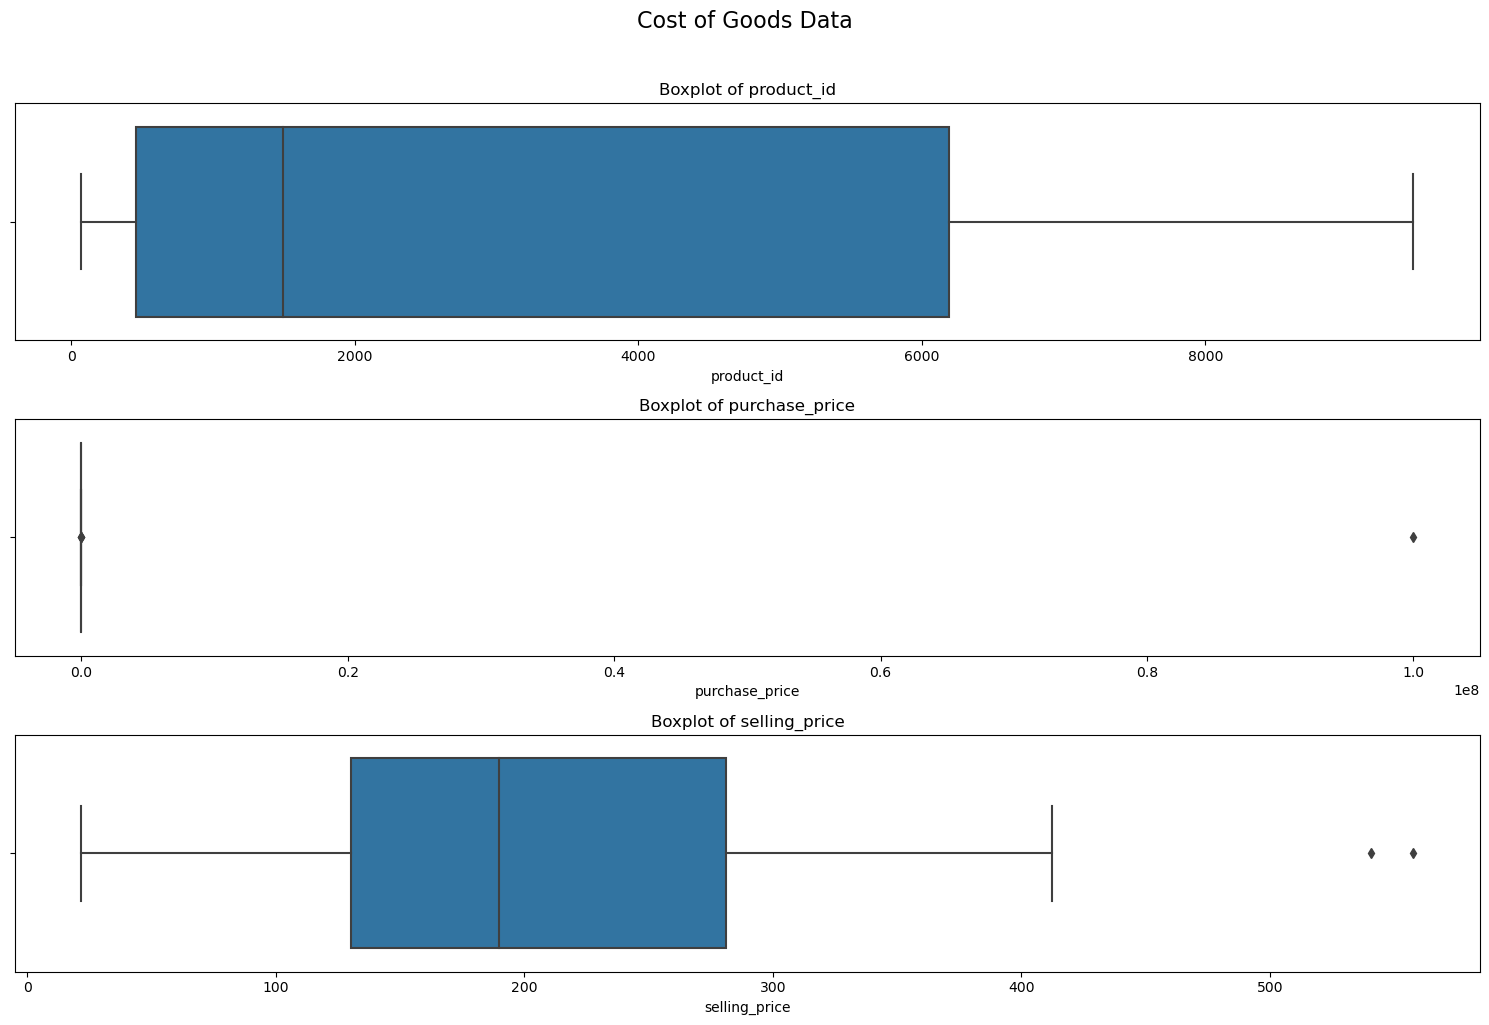

Boxplots for Product Sales Order Data:


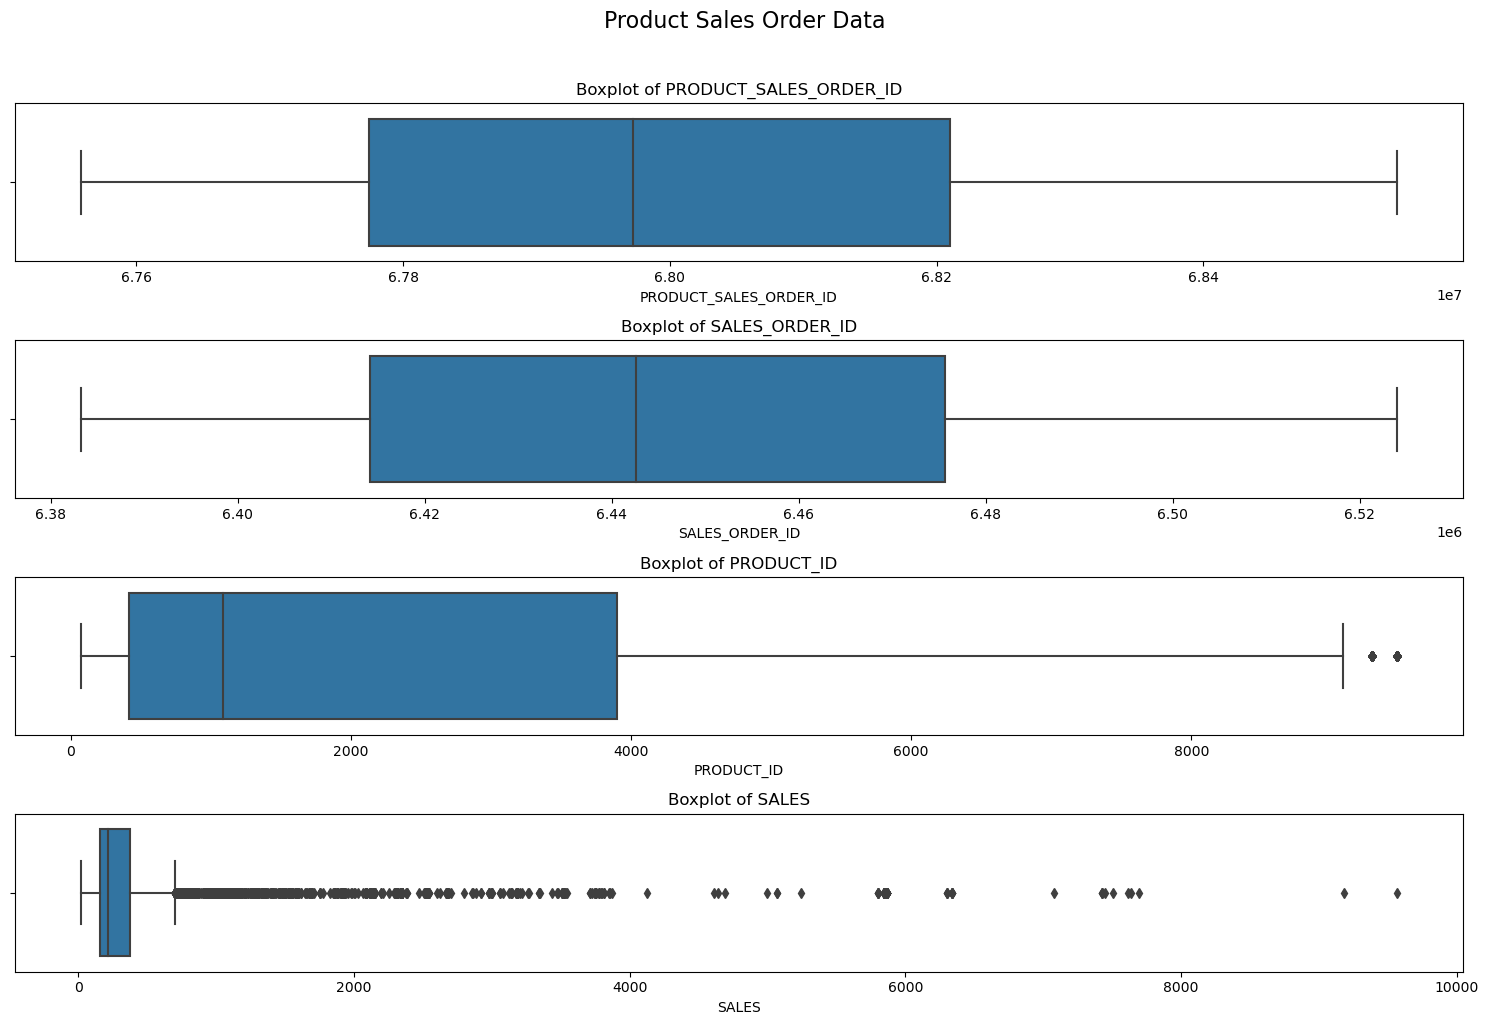

Detecting the Nulls of the Datasets..
ORDER_ID        0
DATE            0
DAY_NAME        0
Order_status    0
SALES           1
dtype: int64
product_id        0
purchase_price    0
selling_price     0
dtype: int64
PRODUCT_SALES_ORDER_ID    0
SALES_ORDER_ID            0
PRODUCT_ID                0
SALES                     0
dtype: int64
BoxPlot of Datasets after handle the Outliers
Boxplots for Sales Orders Data:


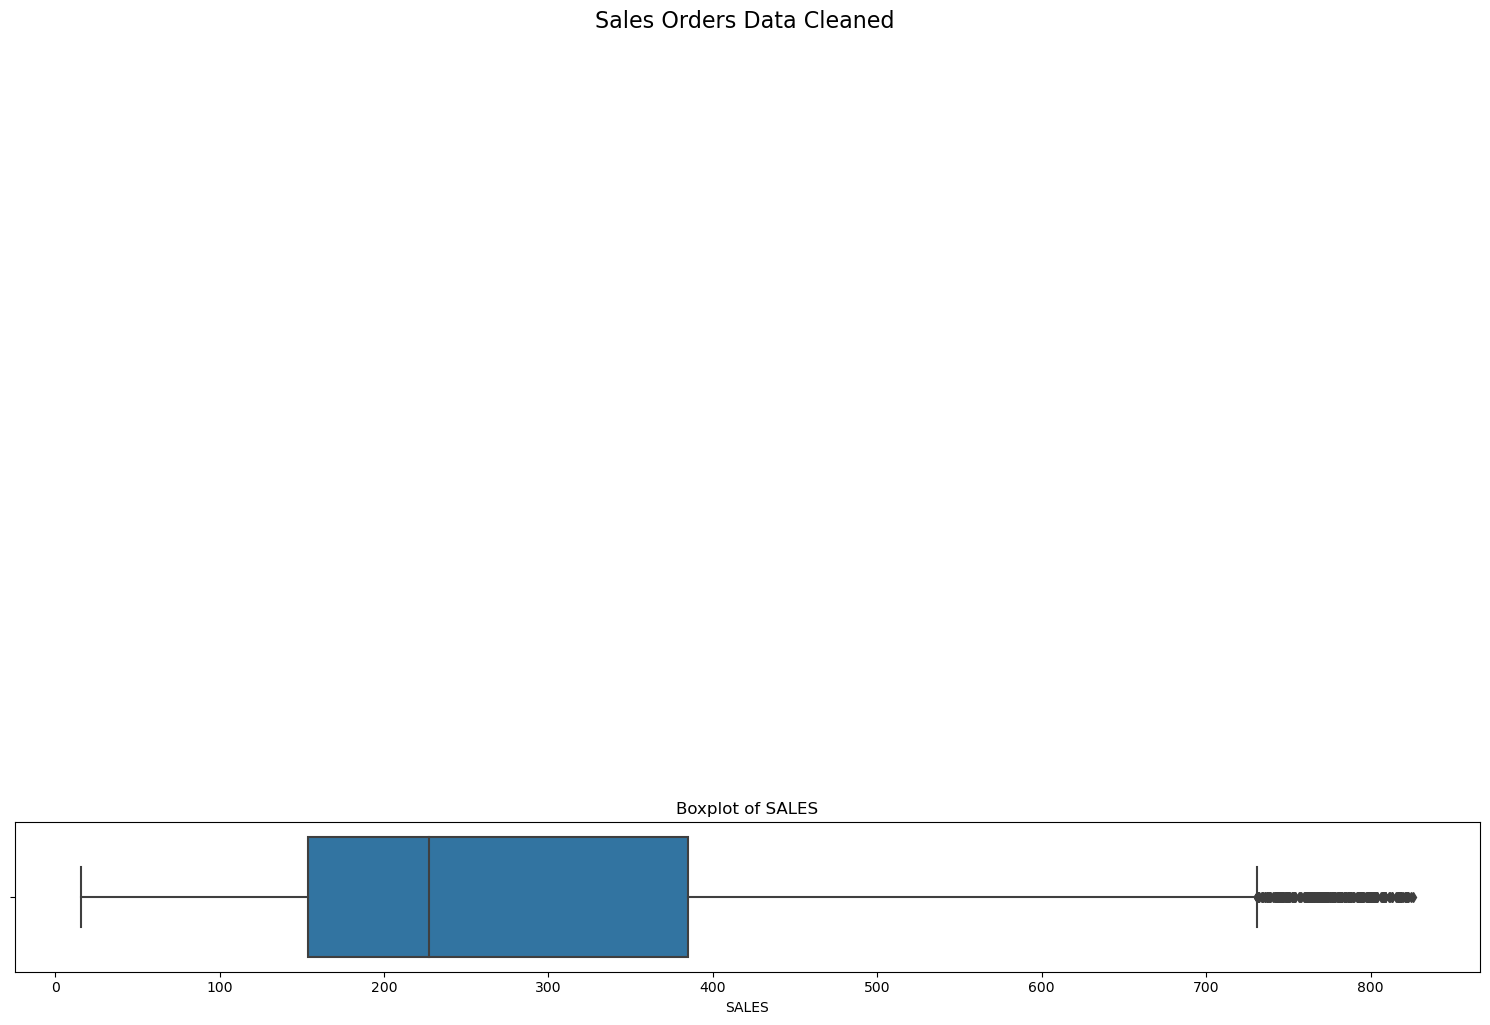

Boxplots for Cost of Goods Data:


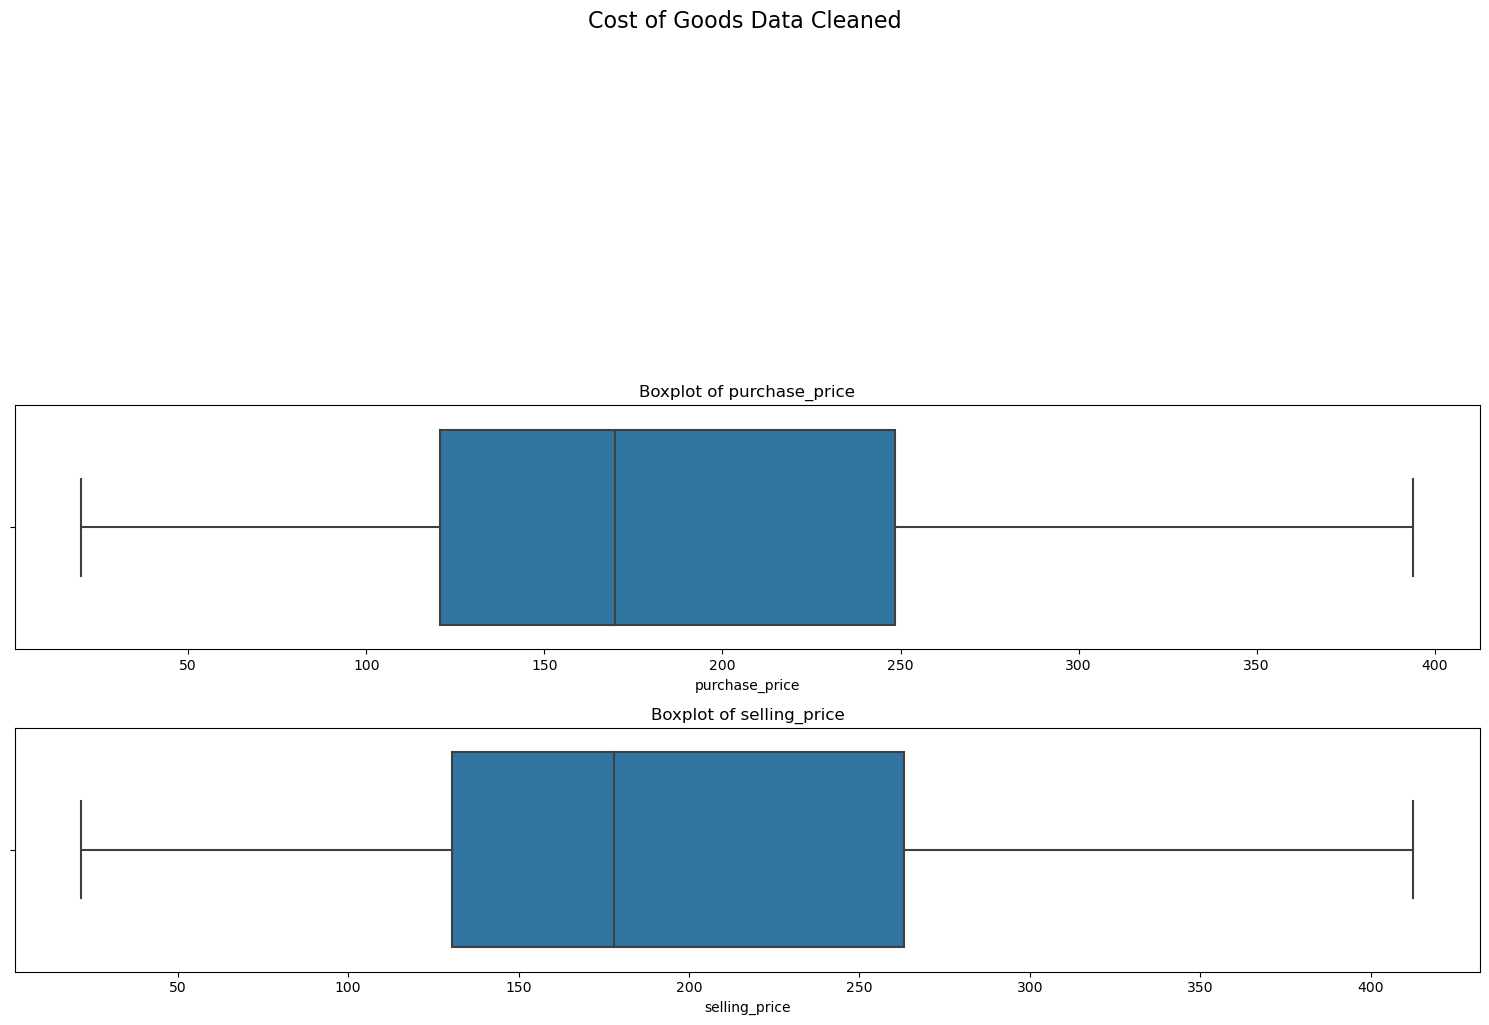

,ORDER_ID,DATE,DAY_NAME,Order_status,SALES
0,6387833,2023-10-01,Sun,Delivered,285.5
2,6387475,2023-10-01,Sun,Delivered,197.5
3,6389331,2023-10-01,Sun,Delivered,67.5
4,6390122,2023-10-01,Sun,Delivered,118.0
6,6388097,2023-10-01,Sun,Delivered,457.0


,product_id,purchase_price,selling_price
0,415,270.56,281.75
1,3495,20.01,21.75
2,152,205.08,212.25
4,974,134.01,144.25
5,2438,40.89,43.00


,PRODUCT_SALES_ORDER_ID,SALES_ORDER_ID,PRODUCT_ID,SALES
0,68097611,6460123,2438,390.00
1,68009163,6448262,1087,122.25
2,68097089,6460054,142,166.32
3,68060918,6455556,415,226.50
4,68144928,6466586,361,336.00


In [23]:
# Define a function to plot boxplots for each column to detect the outliers
def plot_boxplots(df, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns, 1):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(len(df.columns), 1, i)
            sns.boxplot(data=df, x=column)
            plt.title(f'Boxplot of {column}')
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot boxplots for each dataset
print("Boxplots for Sales Orders Data:")
plot_boxplots(df_sales_orders, 'Sales Orders Data')

print("Boxplots for Cost of Goods Data:")
plot_boxplots(df_cost_of_goods, 'Cost of Goods Data')

print("Boxplots for Product Sales Order Data:")
plot_boxplots(df_product_sales_order, 'Product Sales Order Data')



def handle_outliers(df, column_name, method='remove'):
    """
    Detect and handle outliers in a specified column of a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to check for outliers.
    method (str): The method to handle outliers ('remove' or 'replace'). Default is 'remove'.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers handled.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if method == 'remove':
        # Remove outliers
        df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    elif method == 'replace':
        # Replace outliers with the median
        median_value = df[column_name].median()
        df_cleaned = df.copy()
        df_cleaned[column_name] = df_cleaned[column_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    else:
        raise ValueError("Method should be 'remove' or 'replace'")
    
    return df_cleaned



# Rename columns
df_sales_orders.columns = ['ORDER_ID', 'DATE', 'DAY_NAME', 'Order_status', 'SALES']
df_cost_of_goods.columns = ['product_id', 'purchase_price', 'selling_price']
df_product_sales_order.columns = ['PRODUCT_SALES_ORDER_ID', 'SALES_ORDER_ID', 'PRODUCT_ID', 'SALES']

# Convert DATE to datetime
df_sales_orders['DATE'] = pd.to_datetime(df_sales_orders['DATE'])

# Convert other columns to appropriate data types
df_sales_orders['ORDER_ID'] = df_sales_orders['ORDER_ID'].astype(str)
df_sales_orders['DAY_NAME'] = df_sales_orders['DAY_NAME'].astype(str)
df_sales_orders['Order_status'] = df_sales_orders['Order_status'].astype(str)
df_sales_orders['SALES'] = df_sales_orders['SALES'].astype(float)

df_cost_of_goods['product_id'] = df_cost_of_goods['product_id'].astype(str)
df_cost_of_goods['purchase_price'] = df_cost_of_goods['purchase_price'].astype(float)
df_cost_of_goods['selling_price'] = df_cost_of_goods['selling_price'].astype(float)

df_product_sales_order['PRODUCT_SALES_ORDER_ID'] = df_product_sales_order['PRODUCT_SALES_ORDER_ID'].astype(str)
df_product_sales_order['SALES_ORDER_ID'] = df_product_sales_order['SALES_ORDER_ID'].astype(str)
df_product_sales_order['PRODUCT_ID'] = df_product_sales_order['PRODUCT_ID'].astype(str)
df_product_sales_order['SALES'] = df_product_sales_order['SALES'].astype(float)

# Detect nulls
print('Detecting the Nulls of the Datasets..')
print(df_sales_orders.isnull().sum())
print(df_cost_of_goods.isnull().sum())  
print(df_product_sales_order.isnull().sum())

# Handle nulls
sales_orders = df_sales_orders.dropna()
cost_of_goods = df_cost_of_goods.dropna()
product_sales_order = df_product_sales_order.dropna()

# Handle outliers
sales_orders_cleaned = handle_outliers(sales_orders, 'SALES', method='remove')
cost_of_goods_cleaned = handle_outliers(cost_of_goods, 'purchase_price', method='remove')
cost_of_goods_cleaned = handle_outliers(cost_of_goods_cleaned, 'selling_price', method='remove')

# Plot boxplots for each dataset after handle outliers
print('BoxPlot of Datasets after handle the Outliers')

print("Boxplots for Sales Orders Data:")
plot_boxplots(sales_orders_cleaned, 'Sales Orders Data Cleaned')

print("Boxplots for Cost of Goods Data:")
plot_boxplots(cost_of_goods_cleaned, 'Cost of Goods Data Cleaned')


# Display cleaned datasets
display(sales_orders_cleaned.head())
display(cost_of_goods_cleaned.head())
display(product_sales_order.head())


Q1: Calculate total sales (delivered orders only) per day.

In [24]:
delivered_orders = sales_orders_cleaned[sales_orders_cleaned['Order_status'] == 'Delivered']
total_sales_per_day = delivered_orders.groupby(['DATE','DAY_NAME'])['SALES'].sum().reset_index()
display(total_sales_per_day)

,DATE,DAY_NAME,SALES
0,2023-10-01,Sun,250217.2520
1,2023-10-02,Mon,196242.6800
2,2023-10-03,Tue,270974.7280
3,2023-10-04,Wed,294878.4200
4,2023-10-05,Thu,130281.1763
5,2023-10-06,Fri,162618.2163
6,2023-10-07,Sat,241570.2200
7,2023-10-08,Sun,255486.0180
8,2023-10-09,Mon,226790.0263
9,2023-10-10,Tue,175416.3120


Q2: Predict the 4th-week total sales (delivered only).

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sum sales per day
daily_sales = delivered_orders.groupby('DATE')['SALES'].sum()

# Apply time series forecasting
model = ExponentialSmoothing(daily_sales, trend='add', seasonal='add', seasonal_periods=7).fit()
forecast = model.forecast(7)
display(forecast)

c:\Users\MOHAMED_DAYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MOHAMED_DAYAN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2023-10-22    205455.073373
2023-10-23    187166.745196
2023-10-24    146396.619476
2023-10-25    203914.369778
2023-10-26     94172.434625
2023-10-27    102547.285338
2023-10-28    187498.968788
Freq: D, dtype: float64

Q3: Contribution of Wednesday and Friday in the 4th week.

In [26]:
forecast_df = forecast.reset_index()
forecast_df.columns = ['DATE', 'SALES']
forecast_df['DAY_NAME'] = forecast_df['DATE'].dt.day_name()

wednesday_sales = forecast_df[forecast_df['DAY_NAME'] == 'Wednesday']['SALES'].sum()
print(f"Contribution of Wednesday sales: {wednesday_sales:.2f}")    
friday_sales = forecast_df[forecast_df['DAY_NAME'] == 'Friday']['SALES'].sum()
print(f"Contribution of Friday sales: {friday_sales:.2f}")  

Contribution of Wednesday sales: 203914.37
Contribution of Friday sales: 102547.29


Q4: Highest sales week and highest sales day.

In [27]:
# Concatenate the 4th Week with the past 3 Weeks
four_week_df = pd.concat([total_sales_per_day, forecast_df])

four_week_df['WEEK'] = four_week_df['DATE'].dt.isocalendar().week
weekly_sales = four_week_df.groupby('WEEK')['SALES'].sum()
highest_sales_week = weekly_sales.idxmax()
print(f'The week {highest_sales_week} has the highest salary')

daily_sales = four_week_df.groupby(['WEEK', 'DAY_NAME'])['SALES'].sum()
highest_sales_day = daily_sales.groupby('DAY_NAME').sum().idxmax()
print(f'The day {highest_sales_day} has the highest salary per week')

The week 40 has the highest salary
The day Wed has the highest salary per week


Q5: Calculate the margin percentage per product.

In [28]:
merged_data = product_sales_order.merge(cost_of_goods_cleaned, left_on='PRODUCT_ID', right_on='product_id').drop(columns='product_id')
merged_data['margin_percentage'] = (merged_data['selling_price'] - merged_data['purchase_price']) / merged_data['selling_price'] * 100
display(merged_data)

,PRODUCT_SALES_ORDER_ID,SALES_ORDER_ID,PRODUCT_ID,SALES,purchase_price,selling_price,margin_percentage
0,68097611,6460123,2438,390.00,40.89,43.00,4.906977
1,68152772,6467753,2438,375.25,40.89,43.00,4.906977
2,68064414,6456049,2438,97.50,40.89,43.00,4.906977
3,68262162,6483550,2438,383.75,40.89,43.00,4.906977
4,68359547,6497340,2438,129.00,40.89,43.00,4.906977
...,...,...,...,...,...,...,...
17700,67702187,6404700,3495,32.00,20.01,21.75,8.000000
17701,67860485,6426547,3495,640.00,20.01,21.75,8.000000
17702,67802177,6418147,3495,32.00,20.01,21.75,8.000000
17703,67723651,6407768,3495,48.00,20.01,21.75,8.000000


Q6: Calculate the gross profit per product.

In [29]:
merged_data['gross_profit'] = merged_data['SALES'] * (merged_data['selling_price'] - merged_data['purchase_price'])
display(merged_data)

,PRODUCT_SALES_ORDER_ID,SALES_ORDER_ID,PRODUCT_ID,SALES,purchase_price,selling_price,margin_percentage,gross_profit
0,68097611,6460123,2438,390.00,40.89,43.00,4.906977,822.9000
1,68152772,6467753,2438,375.25,40.89,43.00,4.906977,791.7775
2,68064414,6456049,2438,97.50,40.89,43.00,4.906977,205.7250
3,68262162,6483550,2438,383.75,40.89,43.00,4.906977,809.7125
4,68359547,6497340,2438,129.00,40.89,43.00,4.906977,272.1900
...,...,...,...,...,...,...,...,...
17700,67702187,6404700,3495,32.00,20.01,21.75,8.000000,55.6800
17701,67860485,6426547,3495,640.00,20.01,21.75,8.000000,1113.6000
17702,67802177,6418147,3495,32.00,20.01,21.75,8.000000,55.6800
17703,67723651,6407768,3495,48.00,20.01,21.75,8.000000,83.5200


Q7: Top 3 and bottom 3 products in terms of gross profit.

In [30]:
top_3_products = merged_data.groupby('PRODUCT_ID')['gross_profit'].sum().nlargest(3)
print(top_3_products)
bottom_3_products = merged_data.groupby('PRODUCT_ID')['gross_profit'].sum().nsmallest(3)
print(bottom_3_products)

PRODUCT_ID
583     1.748121e+07
2778    7.000866e+06
7558    4.447420e+06
Name: gross_profit, dtype: float64
PRODUCT_ID
3495     11414.4000
1222     77475.6075
1765    341831.3500
Name: gross_profit, dtype: float64


Q8: Recommendations to increase gross profit.

- Optimize pricing strategies.
- Focus on high-margin products.
- Reduce costs of goods sold.

Q9: If the 3 datasets (Sales_orders, Cost_of_Goods & Product_sales_order) were tables in database, write a simple SQL query to create 1 table that has the total number of unique delivered products and the total number of unique canceled products per day for the first week and create a flag that is equal to 1 if that day had more than than 5 unique products delivered and 0 else wise. Also make sure your answer doesn't contain fully duplicated rows 

## SQL Query to Create the Desired Table

```sql
SELECT DISTINCT
    DATE,
    unique_delivered_products,
    unique_canceled_products,
    CASE 
        WHEN unique_delivered_products > 5 THEN 1
        ELSE 0
    END AS delivery_flag
FROM (
    SELECT
        so.DATE,
        COUNT(DISTINCT CASE WHEN so.Order_status = 'Delivered' THEN pso.PRODUCT_ID END) AS unique_delivered_products,
        COUNT(DISTINCT CASE WHEN so.Order_status = 'Canceled' THEN pso.PRODUCT_ID END) AS unique_canceled_products
    FROM 
        Sales_orders so
    JOIN 
        Product_sales_order pso
    ON 
        so.ORDER_ID = pso.SALES_ORDER_ID
    WHERE
        DATE(so.DATE) BETWEEN '2023-10-01' AND '2023-10-07'
    GROUP BY
        so.DATE
) AS daily_counts
ORDER BY
    DATE;